In [1]:
from openqaoa.problems import MaximumCut
from openqaoa.backends import create_device
from openqaoa import QAOA
import networkx as nx
from qiskit.tools.visualization import plot_histogram
from openqaoa.utilities import random_k_regular_graph, plot_graph

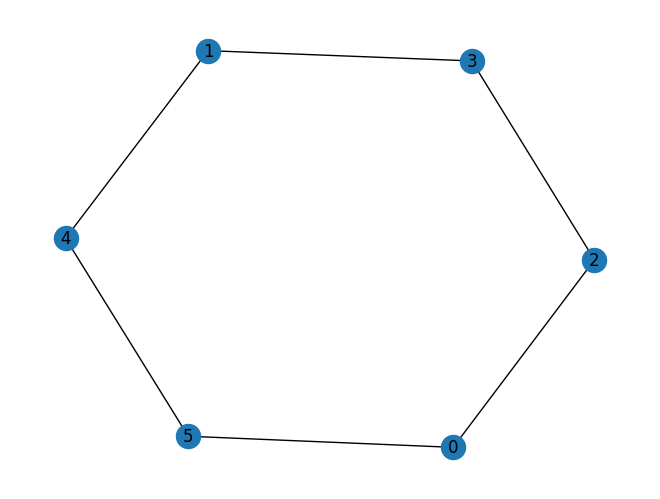

In [8]:
ring = random_k_regular_graph(degree=2,nodes=[0,1,2,3,4,5],seed=234345)
prob = MaximumCut(ring)
qubo = prob.qubo
nx.draw(ring, with_labels=True)

In [9]:
from openqaoa.utilities import ground_state_hamiltonian
ground_state_hamiltonian(qubo.hamiltonian)

(-6.0, ['010110', '101001'])

In [10]:
q_sim = QAOA()
q_sim.set_device(create_device('local','qiskit.shot_simulator'))
q_sim.set_backend_properties(n_shots=2000)
q_sim.set_circuit_properties(param_type="standard",init_type="ramp")
q_sim.set_classical_optimizer(maxiter=20, method='COBYLA')
q_sim.compile(qubo)

In [11]:
q_sim.optimize()

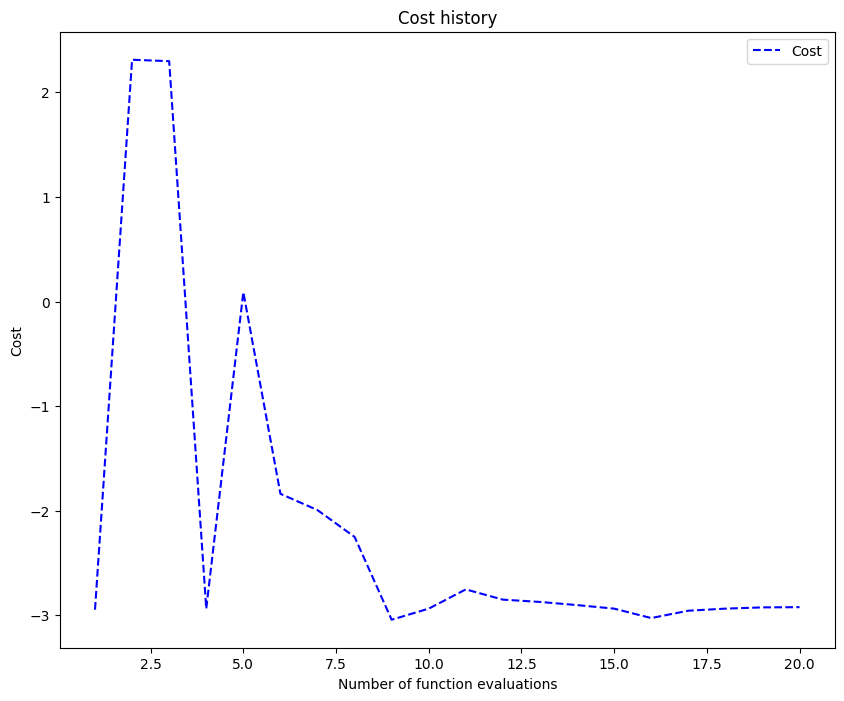

In [12]:
q_sim.result.plot_cost()

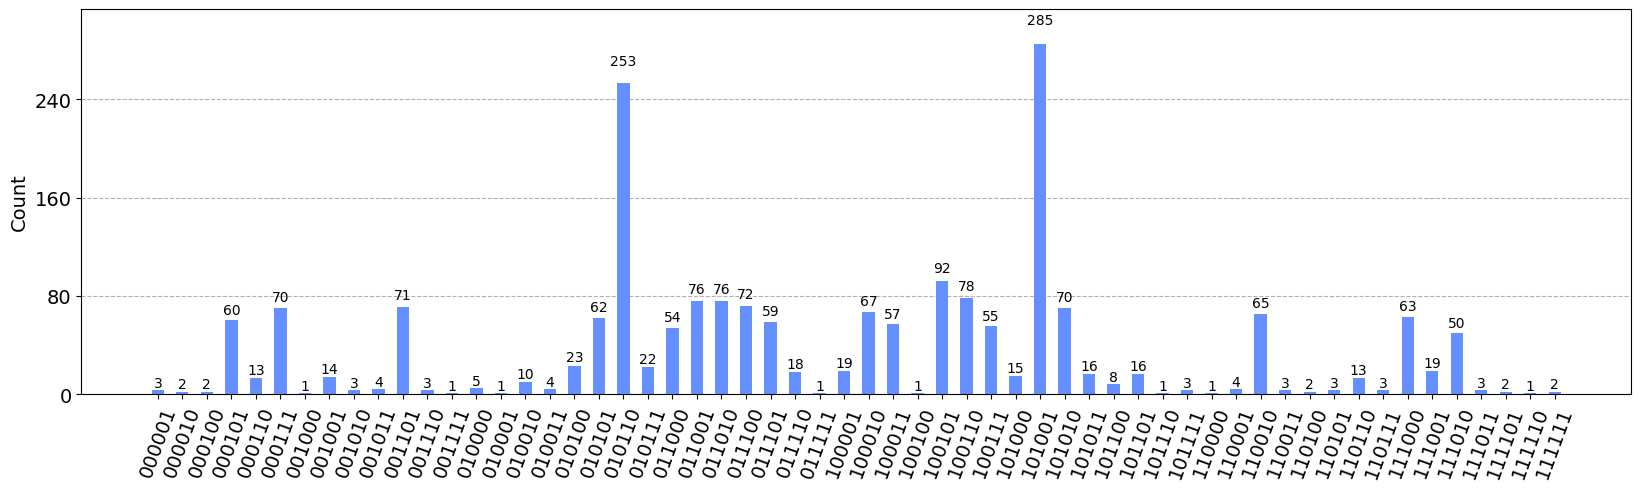

In [13]:
optimized_angles = q_sim.result.optimized["angles"]

#set variate angles with optimized value
q_sim.variate_params.update_from_raw(optimized_angles)

opt_counts_sim = q_sim.backend.get_counts(q_sim.variate_params)
plot_histogram(opt_counts_sim, figsize=(20,5))

In [15]:
fire_device = create_device('qctrl',
                    name='ibm_lagos',
                    hub='ibm-q-startup',
                    group='entropica-labs',
                    project='reservations')

In [19]:
q = QAOA()
q.set_device(fire_device)
q.set_circuit_properties(param_type="standard",init_type="ramp")
q.set_backend_properties(n_shots=2000)
q.set_classical_optimizer(method="COBYLA", maxiter=19)

In [20]:
q.compile(qubo)

## Experiment running OpenQAOA computations using FireOpal on IBMQ

In [ ]:
q.optimize()

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.
Traceback (most recent call last):
  File "/Users/vishal/opt/anaconda3/envs/oq_clone_apr23/lib/python3.10/site-packages/scipy/optimize/_cobyla_py.py", line 258, in calcfc
    f = fun(np.copy(x), *args)
  File "/Users/vishal/Documents/Github/openqaoa/src/openqaoa-core/optimizers/training_vqa.py", line 234, in optimize_this
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
    callback_cost = self.vqa.expectation(self.variational_params, **n_shots_dict)
  File "/Users/vishal/Documents/Github/openqaoa/src/openqaoa-core/utilities.py", line 252, in wrapper
    values = function(*args, **kwargs)
  File "/Users/vishal/Documents/Github/openqaoa/src/openqaoa-core/backends/basebackend.py", line 284, in expectation
    counts = self.get_counts(params, n_shots)
  File "/Users/vishal/Documents/Github/openqaoa/src/openqaoa-fireopal/bac

In [1]:
q.dumps()

NameError: name 'q' is not defined

In [ ]:
from openqaoa.backends.cost_function import cost_function

In [ ]:
q.dump("Test_optimization_using_FireOpal")

## Solving Maxcut using FireOpal `solve_qaoa`

In [ ]:
fire_result = fireopal.solve_qaoa(prob.G, "maxcut", fire_device_reserved.credentials, fire_device_reserved.device_name)